<a href="https://colab.research.google.com/github/Epsoto7/Proyecto_flores/blob/main/Prueba_modelo_flores_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#prueba de modelo
import tensorflow as tf
from google.colab import drive
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargar dataset
import tensorflow_datasets as tfds
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name="oxford_flowers102",
    split=['train', 'validation', 'test'],
    with_info=True,
    as_supervised=True,
    batch_size=32
)

In [ ]:
#Funcion para normalizar las imágenes [-1,1]
IMAG_SIZE = 224 # All images will be resized to 224x224
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMAG_SIZE, IMAG_SIZE))
  return  image, label
#aplicar la funcion anterior a cada dataset
train = raw_train.map(normalize_img)
validation = raw_validation.map(normalize_img)
test = raw_test.map(normalize_img)

In [ ]:
#cargar el modelo guardado
import tensorflow as tf
import tensorflow_hub as hub

# Definir el diccionario de objetos personalizados
custom_objects = {'KerasLayer': hub.KerasLayer}

# Cargar el modelo pasando el diccionario custom_objects
model = tf.keras.models.load_model('/content/drive/My Drive/Curso_IA/modelo_entrenado.h5', custom_objects=custom_objects)


In [ ]:
type(model)

keras.src.engine.sequential.Sequential

In [ ]:
# Evaluar el modelo en el conjunto de datos de prueba
loss, accuracy = model.evaluate(test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


193/193 [==============================] - 267s 1s/step - loss: 0.9464 - accuracy: 0.7946
Loss: 0.9463820457458496
Accuracy: 0.7946007251739502


In [ ]:
# Obtener un lote de datos del conjunto de datos de prueba y realizar predicciones
for images, labels in test.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    print("Predicciones:", predicted_classes)
    print("Etiquetas reales:", labels.numpy())

1/1 [==============================] - 4s 4s/step
Predicciones: [ 40  76  29  63  89  45  94  19  51  46  73  70  72  93  89 100  95  72
  49  75  57  75  77  45  45  24  35  65  41  72  73  46]
Etiquetas reales: [40 76 42 63 94 45 94 19 51 46 73 70 72 93 89 10 95 72 49 75 57 75 77 45
 45 24 95 65 89 72 73 88]


In [ ]:
# Nombre de las clases
class_names = np.array(metadata.features['label'].names)
print(class_names)

['pink primrose' 'hard-leaved pocket orchid' 'canterbury bells'
 'sweet pea' 'english marigold' 'tiger lily' 'moon orchid'
 'bird of paradise' 'monkshood' 'globe thistle' 'snapdragon' "colt's foot"
 'king protea' 'spear thistle' 'yellow iris' 'globe-flower'
 'purple coneflower' 'peruvian lily' 'balloon flower'
 'giant white arum lily' 'fire lily' 'pincushion flower' 'fritillary'
 'red ginger' 'grape hyacinth' 'corn poppy' 'prince of wales feathers'
 'stemless gentian' 'artichoke' 'sweet william' 'carnation' 'garden phlox'
 'love in the mist' 'mexican aster' 'alpine sea holly'
 'ruby-lipped cattleya' 'cape flower' 'great masterwort' 'siam tulip'
 'lenten rose' 'barbeton daisy' 'daffodil' 'sword lily' 'poinsettia'
 'bolero deep blue' 'wallflower' 'marigold' 'buttercup' 'oxeye daisy'
 'common dandelion' 'petunia' 'wild pansy' 'primula' 'sunflower'
 'pelargonium' 'bishop of llandaff' 'gaura' 'geranium' 'orange dahlia'
 'pink-yellow dahlia?' 'cautleya spicata' 'japanese anemone'
 'black-eye

In [ ]:
#generar un batch de imagenes con sus etiquetas
image_batch, label_batch = next(iter(test))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = [class_names[id] for id in predicted_ids]
print(predicted_class_names)

1/1 [==============================] - 1s 1s/step
['barbeton daisy', 'passion flower', 'sweet william', 'silverbush', 'canna lily', 'wallflower', 'bougainvillea', 'giant white arum lily', 'wild pansy', 'marigold', 'rose', 'gazania', 'water lily', 'foxglove', 'canna lily', 'trumpet creeper', 'camellia', 'water lily', 'common dandelion', 'morning glory', 'geranium', 'morning glory', 'lotus', 'wallflower', 'wallflower', 'grape hyacinth', 'ruby-lipped cattleya', 'osteospermum', 'daffodil', 'water lily', 'rose', 'marigold']


In [ ]:
true_class_names = [class_names[lb] for lb in label_batch]
print(true_class_names)

['barbeton daisy', 'passion flower', 'sword lily', 'silverbush', 'bougainvillea', 'wallflower', 'bougainvillea', 'giant white arum lily', 'wild pansy', 'marigold', 'rose', 'gazania', 'water lily', 'foxglove', 'canna lily', 'snapdragon', 'camellia', 'water lily', 'common dandelion', 'morning glory', 'geranium', 'morning glory', 'lotus', 'wallflower', 'wallflower', 'grape hyacinth', 'camellia', 'osteospermum', 'canna lily', 'water lily', 'rose', 'watercress']


In [ ]:
# Comparar las predicciones con las clases reales y calcular precisión en las imagenes predichas
accuracy = np.mean(predicted_ids == label_batch)
print("Accuracy:", accuracy)

Accuracy: 0.8125


In [ ]:
import matplotlib.pylab as plt

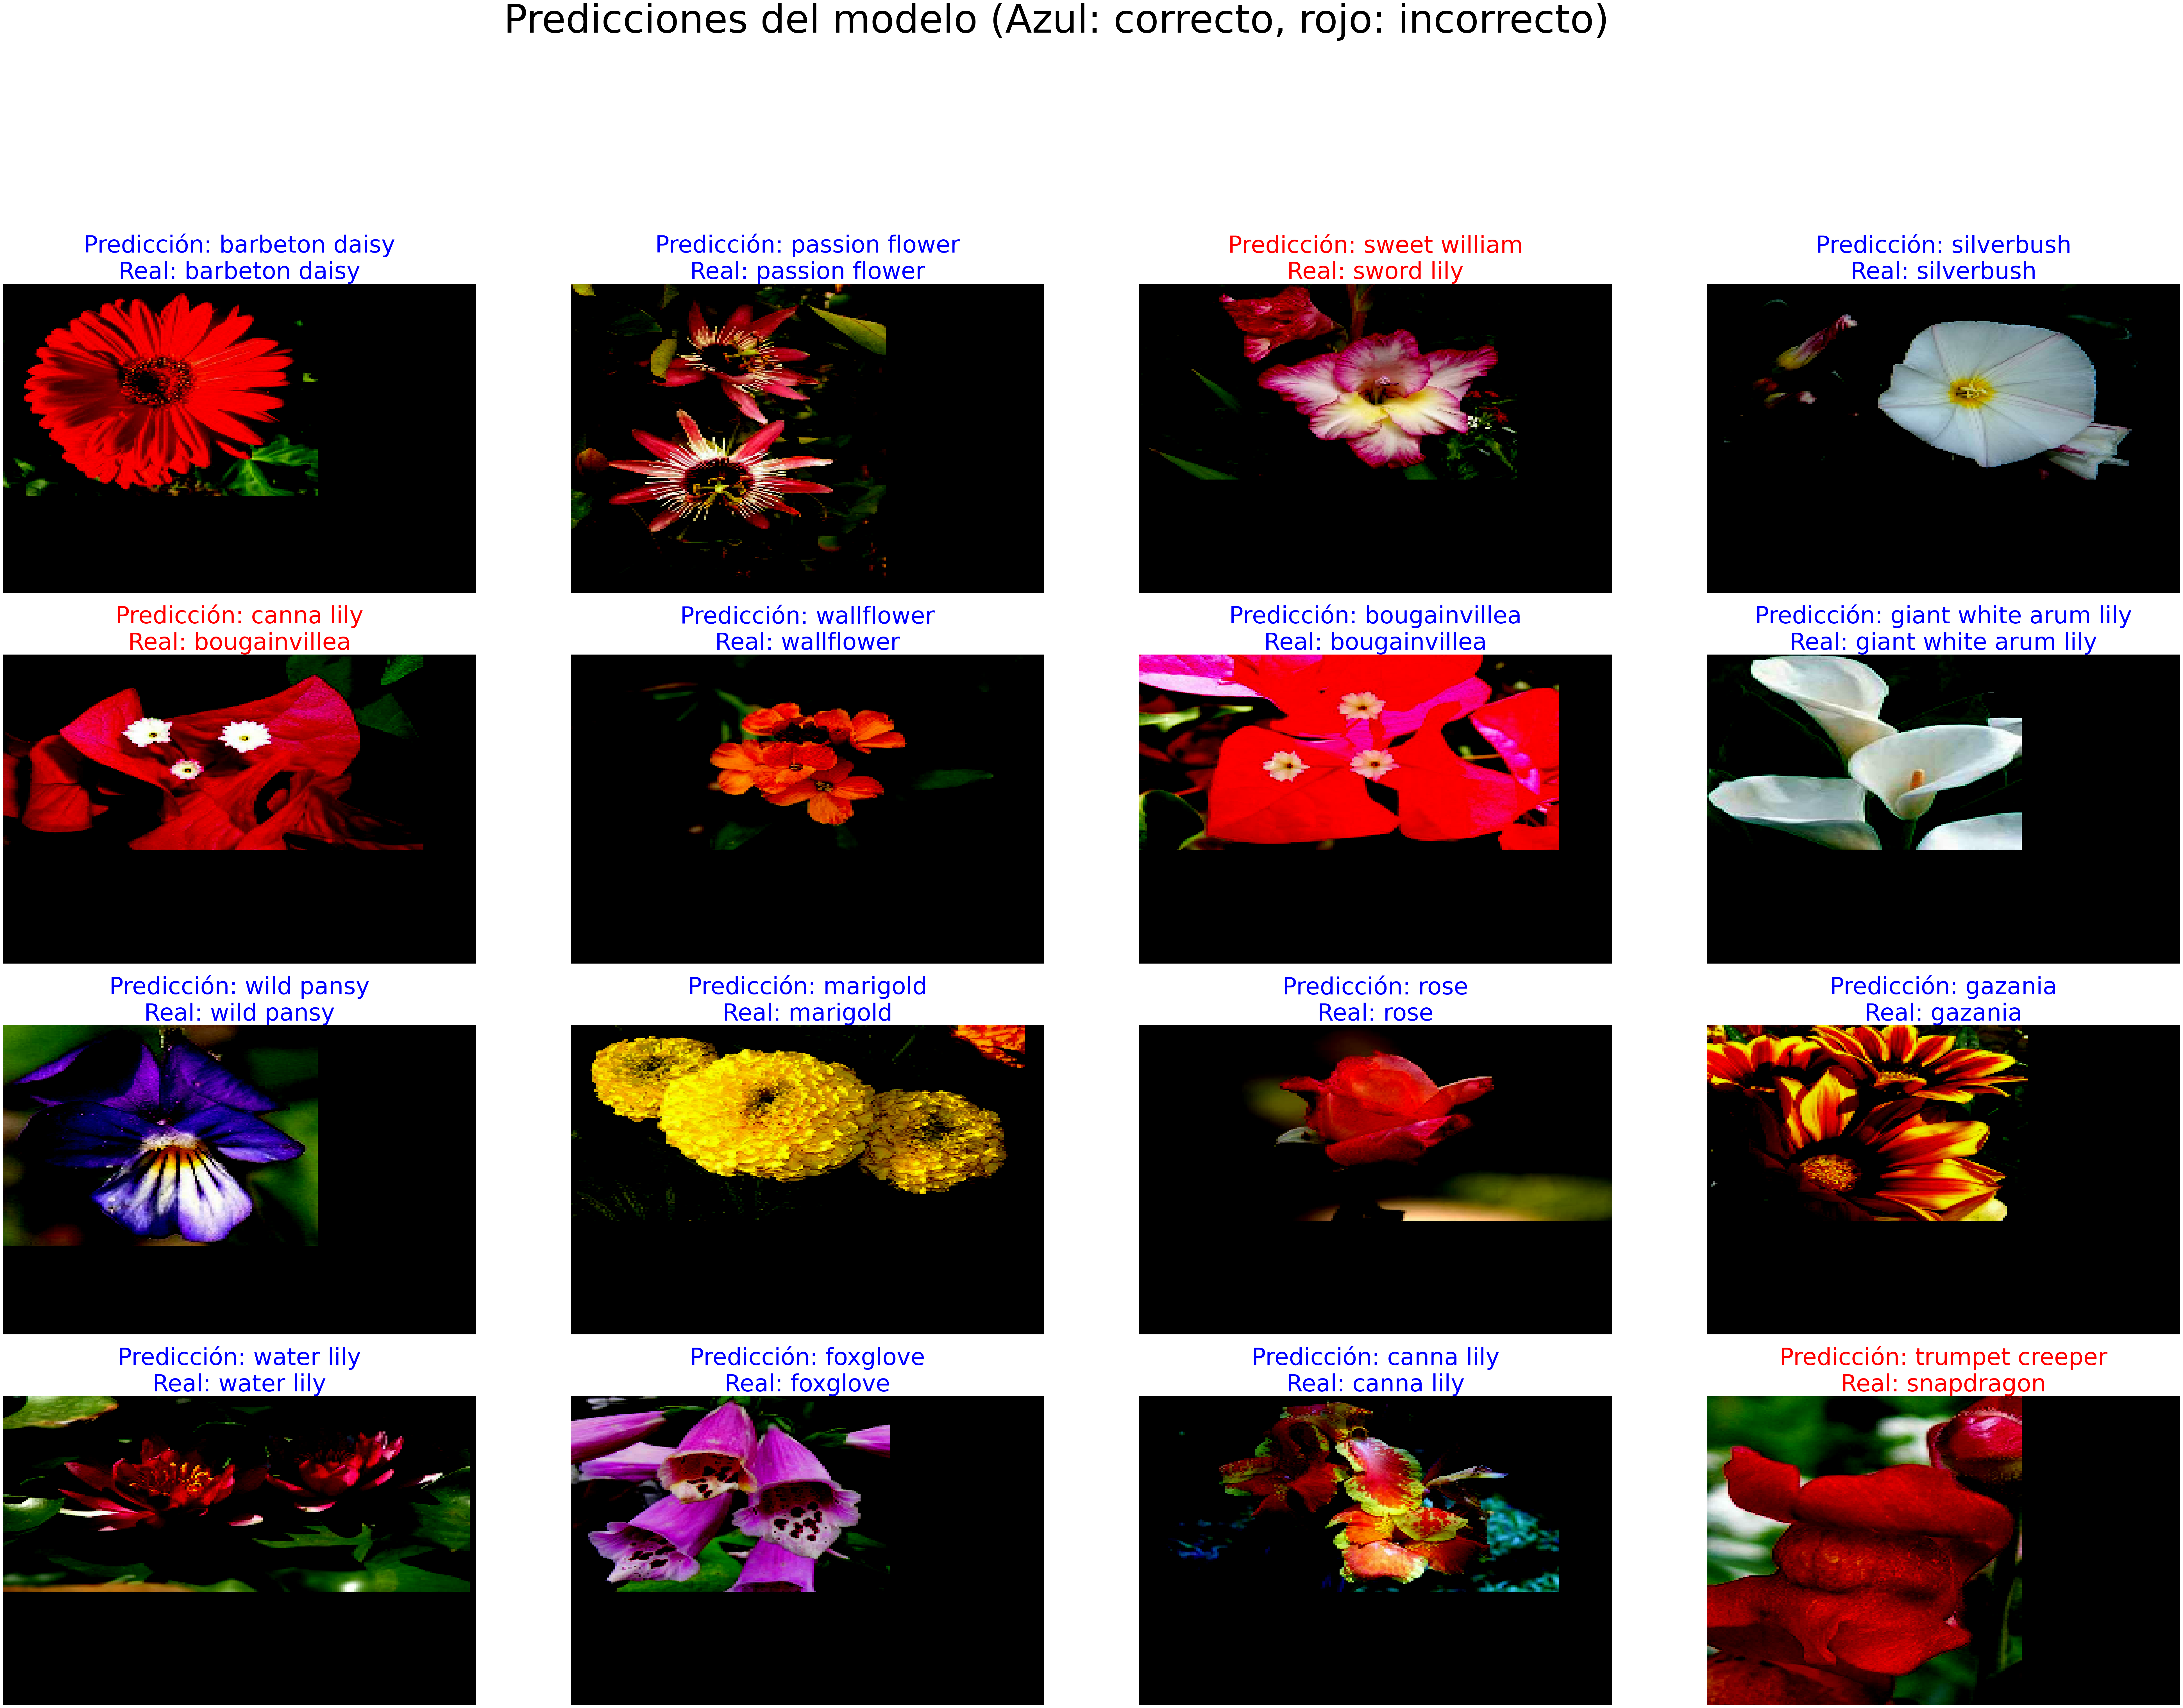

In [ ]:
plt.figure(figsize=(100,100))
for n in range(16):
  plt.subplot(6,4,n+1)
  plt.imshow(image_batch[n], aspect='auto', extent=plt.axis())
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(f'Predicción: {predicted_class_names[n]}\nReal: {class_names[label_batch[n]]}', color=color, size=60)
  plt.axis('off')
  #plt.title(true_class_names[n].title(), color=color,size=42)

  plt.suptitle("Predicciones del modelo (Azul: correcto, rojo: incorrecto)",size=100)